In [1]:
%matplotlib widget 
# installing ipympl

In [2]:
import numpy as np, scipy as sp
from scipy import special
from matplotlib import pyplot as plt
from ipywidgets import interact

We want to look at our temperature in a plate, where it is fixed at 0 along x=0, 0 along x=10, and 100 at y=0. For this, we get

$$T(x,y) = \sum_{\mathrm{odd\ n}} \frac{400}{n\pi} e^{-n\pi y/10}\sin{\frac{n\pi x}{10}}$$

interactive(children=(IntSlider(value=0, description='N'), Output()), _dom_classes=('widget-interact',))

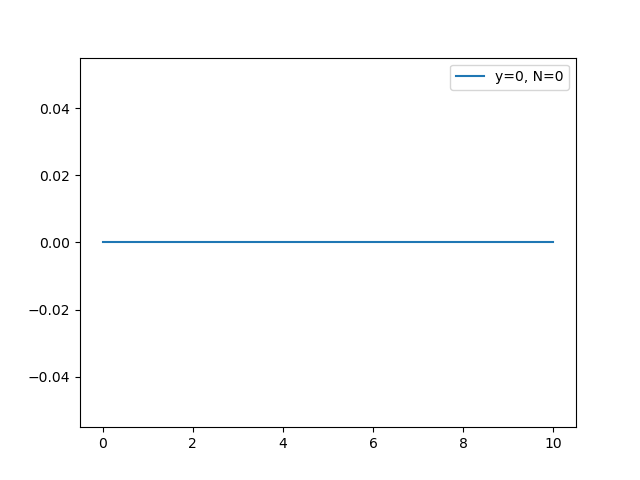

In [3]:
def b(n):
    if n%2 == 0:
        return 0
    else:
        return 400/(n*np.pi)
def T(x,y,N):
    x = np.array(x)
    y = np.array(y)
    # Expect y to be a single number
    result = np.zeros_like(x)
    for n in range(0,N+1):
        this_term = b(n) * np.exp(-n*np.pi*y/10) * np.sin(n*np.pi*x/10)
        result += this_term
    return result

def plot_t(N=0):
    x = np.linspace(0,10,100)
    y = 0
    plt.clf()
    plt.plot(x,T(x,y,N),label=f'y={y}, N={N}')
    plt.legend()
fig,ax = plt.subplots()
interact(plot_t,N=(0,100));

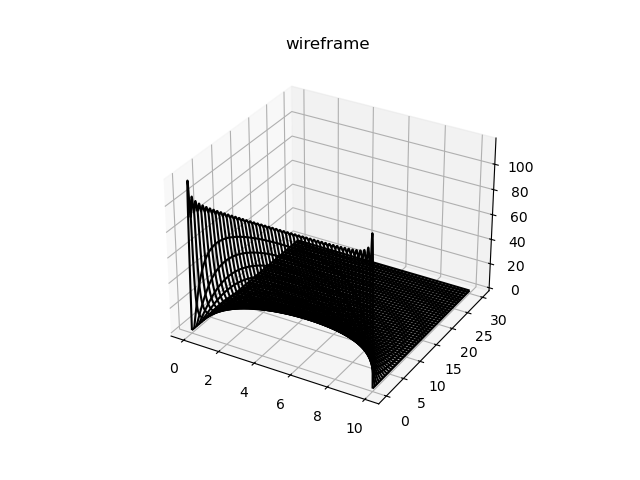

In [10]:
x = np.linspace(0,10,1000)
y = np.linspace(0,30,1000)

X, Y = np.meshgrid(x,y)
Z = T(X,Y,100)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')
plt.show()

Now we want to look at our temperature in a plate, where it is fixed at 0 along x=0, 0 along x=10, 100 at y=0, and 0 at y = 30. For this, we get

$$T(x,y) = \sum_{\mathrm{odd\ n}} B_n \sinh\left(\frac{n\pi}{10}(30-y)\right) \sin{\frac{n\pi x}{10}}$$

Where

$$ B_n = \frac{b_n}{\sinh{3n\pi}}$$

and $b_n = \frac{400}{n\pi}$ for odd n, 0 for even

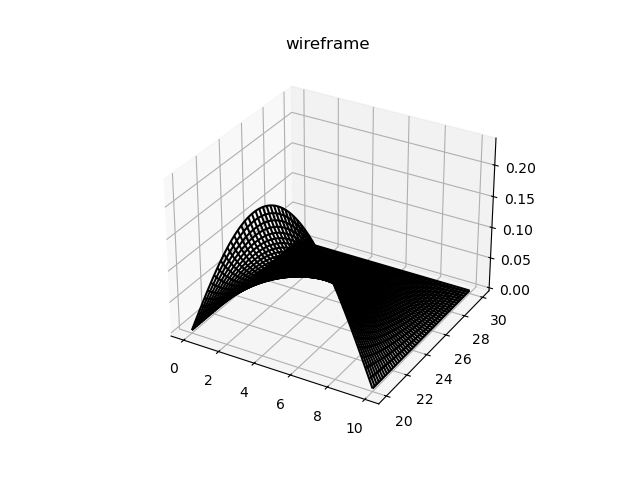

In [9]:
def B(n):
    if n%2 == 0:
        return 0
    else:
        return b(n)/np.sinh(3*n*np.pi)
def T2(x,y,N):
    x = np.array(x)
    y = np.array(y)
    # Expect y to be a single number
    result = np.zeros_like(x)
    for n in range(0,N+1):
        this_term = B(n) * np.sinh((n*np.pi/10)*(30-y)) * np.sin(n*np.pi*x/10)
        result += this_term
    return result

Z = T2(X,Y,30)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')
plt.show()

In [9]:
T(x,30,10)

array([0.00000000e+00, 3.23120661e-05, 6.46238127e-05, 9.69349201e-05,
       1.29245069e-04, 1.61553940e-04, 1.93861213e-04, 2.26166569e-04,
       2.58469688e-04, 2.90770251e-04, 3.23067938e-04, 3.55362431e-04,
       3.87653409e-04, 4.19940554e-04, 4.52223546e-04, 4.84502065e-04,
       5.16775794e-04, 5.49044411e-04, 5.81307599e-04, 6.13565038e-04,
       6.45816409e-04, 6.78061394e-04, 7.10299673e-04, 7.42530927e-04,
       7.74754839e-04, 8.06971088e-04, 8.39179358e-04, 8.71379328e-04,
       9.03570681e-04, 9.35753098e-04, 9.67926261e-04, 1.00008985e-03,
       1.03224355e-03, 1.06438704e-03, 1.09652001e-03, 1.12864213e-03,
       1.16075309e-03, 1.19285258e-03, 1.22494026e-03, 1.25701583e-03,
       1.28907897e-03, 1.32112936e-03, 1.35316669e-03, 1.38519064e-03,
       1.41720088e-03, 1.44919711e-03, 1.48117901e-03, 1.51314626e-03,
       1.54509855e-03, 1.57703556e-03, 1.60895697e-03, 1.64086247e-03,
       1.67275174e-03, 1.70462447e-03, 1.73648035e-03, 1.76831905e-03,
      

In [10]:
T2(x,30,10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.